# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

What insights can we extract from the 2017/2018 ACT and SAT test data to improve SAT participation rates? Are there any areas we can focus on?

## Executive Summary


In this project, I will be analyzing the participation rates and scores for students taking SAT and ACT test across US states in 2017 and 2018. I will be exploring the relationship between participation rates across years, tests and scores. State-by-state comparison will also be done. 

The data has demonstrated that high participation rates in a certain test will reflect a low participation rate in the other test. This is particularly consistent with states that set one of two tests as a mandatory test or as a graduation requirement. There is also a negative correlation between participation rates and average test scores. Averages of test scores remain similar across years. Top and low performing states, which did not see a statewide education policy change, remains similar across years.

From the analysis, I propose to increase SAT participation rates in West Virginia, which has not mandate any tests. The growth potential is high as its SAT participation rate has doubled in 2018 and ACT participation rate has had slight decrease. Geographically, it is located next to two states which has higher and increasing SAT participation rates. Strategies to increase participation rates has been suggested for West Virginia. Other than that, I have also recommended other country-wide strategies to focus on. 


### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Import libraries:

#math
import pandas as pd
import numpy as np

#plotting
import matplotlib.pyplot as plt
import seaborn as sns






## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#reading csv as dataframes
sat_2017_df = pd.read_csv('../data/sat_2017.csv')
act_2017_df = pd.read_csv('../data/act_2017.csv')

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
#printing heads of each dataframe:
print(sat_2017_df.head(10))      
print(act_2017_df.head(10))


                  State Participation  Evidence-Based Reading and Writing  \
0               Alabama            5%                                 593   
1                Alaska           38%                                 547   
2               Arizona           30%                                 563   
3              Arkansas            3%                                 614   
4            California           53%                                 531   
5              Colorado           11%                                 606   
6           Connecticut          100%                                 530   
7              Delaware          100%                                 503   
8  District of Columbia          100%                                 482   
9               Florida           83%                                 520   

   Math  Total  
0   572   1165  
1   533   1080  
2   553   1116  
3   594   1208  
4   524   1055  
5   595   1201  
6   512   1041  
7   492    996  

#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: Both datasets consist of data from each of the 50 states, with ACT 2017 containing an extra data on national participation rates and scores. The data for national participation rates and scores of SAT was not included.  Participation rates for SAT varies across states.



#### 4a. Does the data look complete? 

Answer: No. SAT - index 20 is 52 instead of 524. SAT - percentage sign will make it a string rather than integer. Min of Math in SAT2017 was 52, too low.

ACT
Maryland (index 21) - Science score one digit less, should be 23.2
Wyoming (index 51) - Composite score has a x


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [4]:
#code
#sat_2017_df.set_index(sat_2017_df['State'],inplace=True)

#sat_2017_df: Updating Maryland Math Score to 524
sat_2017_df.loc[(sat_2017_df['State'] == 'Maryland'),'Math'] = 524

#act_2017_df: Update Maryland Science Score to 23.2
act_2017_df.loc[(act_2017_df['State'] == 'Maryland'),'Science'] = 23.2


#### 5. What are your data types? 
Display the data types of each feature. 

In [5]:
#code
sat_2017_df.info()
act_2017_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     object 
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading        52 non-null   

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer: Participation in sat_2017_df and act_2017_df should be int. Composite in act_2017_df should be float.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [6]:
#defining function to remove % and changes the type to float
def remove_pct_float(value):
    '''This function removes '%' and changes the type from object to float

Parameters:
value (object): 

'''
    
    new_value = float(value.replace('%',''))
    return new_value

#mapping the function to the participation column for each dataframe
sat_2017_df['Participation'] = sat_2017_df['Participation'].map(remove_pct_float)    
act_2017_df['Participation'] = act_2017_df['Participation'].map(remove_pct_float)



- Fix any individual values preventing other columns from being the appropriate type.

In [7]:
#act_2017_df: Update Wyoming Composite Score to 20.2

act_2017_df.loc[(act_2017_df['State'] == 'Wyoming'),'Composite'] = 20.2


- Finish your data modifications by making sure the columns are now typed appropriately.

In [8]:
#act_2017_df: converting composite column to float
act_2017_df['Composite'] = act_2017_df['Composite'].astype(float)


- Display the data types again to confirm they are correct.

In [9]:
#checking data types
sat_2017_df.info()
act_2017_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Participation                       51 non-null     float64
 2   Evidence-Based Reading and Writing  51 non-null     int64  
 3   Math                                51 non-null     int64  
 4   Total                               51 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 2.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State          52 non-null     object 
 1   Participation  52 non-null     float64
 2   English        52 non-null     float64
 3   Math           52 non-null     float64
 4   Reading   

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [10]:
#renaming columns of sat2017 using a dictionary
sat_2017_new_columns = {'State':'state','Participation':'sat17_participation','Evidence-Based Reading and Writing':'sat17_read_write','Math':'sat17_math','Total':'sat17_final_score'}
sat_2017_df.rename(columns=sat_2017_new_columns,inplace= True)

#renaming columns of act2017 using a dictionary
act_2017_new_columns = {'State':'state','Participation':'act17_participation', 'English':'act17_english','Math':'act17_math','Reading':'act17_read','Science':'act17_science','Composite':'act17_final_score'}
act_2017_df.rename(columns=act_2017_new_columns,inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|ACT/SAT|US state names in the data| 
|sat17_participation|float|SAT|Percentage of SAT takers among high school students in 2017| 
|sat17_read_write|int|SAT|State average scores for SAT Evidence-based Reading and Writing (ERW) in 2017| 
|sat17_math|int|SAT|State average scores for SAT Math in 2017| 
|sat17_final_score|int|SAT|State average total scores for SAT in 2017| 
|act17_participation|float|ACT|Percentage of ACT takers among high school students in 2017| 
|act17_english|float|ACT|State average scores for ACT English in 2017| 
|act17_math|float|ACT|State average scores for ACT Math in 2017| 
|act17_read|float|ACT|State average scores for ACT Reading in 2017| 
|act17_science|float|ACT|State average scores for ACT Science in 2017| 
|act17_final_score|float|ACT|State average composite scores for ACT in 2017| 




#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [11]:
#act_2017_df: removing "National" row
act_2017_df.drop(index = 0,inplace=True)

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [12]:
#Outer join sat_2017_df to act_2017_df using state
act_sat_2017 = pd.merge(sat_2017_df,act_2017_df,on='state',how='outer')

#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [13]:
#output merged dataframe

act_sat_2017.to_csv('../output/combined_2017.csv', index = False)


## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [14]:
#import 2018 data

sat_2018_df = pd.read_csv('../data/sat_2018.csv')
act_2018_df = pd.read_csv('../data/act_2018_updated.csv')
act_2018_df.columns

Index(['State', 'Percentage of Students Tested', 'Average Composite Score',
       'Average English Score', 'Average Math Score', 'Average Reading Score',
       'Average Science Score'],
      dtype='object')

In [15]:
#sat_2018_df: remove '%' from participation column
sat_2018_df['Participation'] = sat_2018_df['Participation'].map(remove_pct_float)

#act_2018_df: convert type to float for participation column
act_2018_df['Average Composite Score'] = act_2018_df['Average Composite Score'].astype(float)


In [16]:
#renaming columns of sat2018 using a dictionary
sat_2018_new_columns = {'State':'state','Participation':'sat18_participation','Evidence-Based Reading and Writing':'sat18_read_write','Math':'sat18_math','Total':'sat18_final_score'}
sat_2018_df.rename(columns=sat_2018_new_columns,inplace= True)

#renaming columns of act2018 using a dictionary
act_2018_new_columns = {'State':'state','Percentage of Students Tested':'act18_participation', 'Average English Score':'act18_english','Average Math Score':'act18_math','Average Reading Score':'act18_read','Average Science Score':'act18_science','Average Composite Score':'act18_final_score'}
act_2018_df.rename(columns=act_2018_new_columns,inplace=True)

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [17]:
#merge act2018 and sat2018 dataframe
act_sat_2018 = pd.merge(sat_2018_df,act_2018_df,on='state',how='outer')

#merge all 2017 and 2018 dataframe into act_sat
final = pd.merge(act_sat_2017,act_sat_2018,on='state',how='outer')

#output combined dataframe
final.to_csv('../output/final.csv', index = False)


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [18]:
#summary statistics of combined dataframe:

final.describe().T


,count,mean,std,min,25%,50%,75%,max
sat17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_read_write,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat17_final_score,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act17_read,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act17_final_score,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [19]:
#function to calculate standard deviation

def calc_stdev(series):
    '''This function calculates the standard deviation of a numpy series
    
    
    '''
    
    n = len(series)
    mean = np.mean(series)
    difference_list = [(x - mean)**2 for x in series]
    stdev = np.sqrt(np.sum(difference_list)/n)
    return stdev
    

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [20]:
#Code:

sd = {col:calc_stdev(final[col]) for col in final.columns if col != 'state'}


Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

In [21]:
np_std = {col:np.std(final[col]) for col in final.columns if col != 'state'}

In [22]:
sd

{'sat17_participation': 34.929070766645076,
 'sat17_read_write': 45.21697020437866,
 'sat17_math': 46.65713364485504,
 'sat17_final_score': 91.58351056778743,
 'act17_participation': 31.824175751231806,
 'act17_english': 2.3304876369363368,
 'act17_math': 1.9624620273436781,
 'act17_read': 2.046902931484265,
 'act17_science': 1.7222161451443672,
 'act17_final_score': 2.0007860815819893,
 'sat18_participation': 36.946619223539415,
 'sat18_read_write': 47.03460978357609,
 'sat18_math': 47.301945503783536,
 'sat18_final_score': 93.22742384464432,
 'act18_participation': 33.745194881997506,
 'act18_final_score': 2.0855261815801143,
 'act18_english': 2.4222536143202795,
 'act18_math': 2.0157072555557174,
 'act18_read': 2.1458918845104216,
 'act18_science': 1.8516885484833538}

Answer: Manually calculated standard deviation (sd) does not match the output from pandas describe, but matches numpy's std function.

Pandas uses an unbiased estimator(n-1) in the denominator, whereby numpy and the manually calculated formula does not. To fix this for numpy, we can use ddof=1 to numpy.std().

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## States with the Highest and Lowest Participation Rates for Each Test

### 2017 SAT

#### Highest Participation Rates
District of Columbia, Michigan, Connecticut, Delaware, New Hampshire


In [23]:
#sorting 2017 SAT participation rates from highest to lowest
high_participation_sat_2017 = final[['state','sat17_participation']].sort_values('sat17_participation',ascending = False)

#highest 2017 SAT participation rates
high_participation_sat_2017.head()

,state,sat17_participation
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


There are 4 states with 100% participation rates.

#### Lowest Participation Rates
Iowa, Mississippi, North Dakota, Wyoming, Arkansas

In [24]:
#lowest 2017 SAT participation rates
low_participation_sat_2017 = final[['state','sat17_participation']].sort_values('sat17_participation')

low_participation_sat_2017.head()

,state,sat17_participation
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0


### 2018 SAT

#### Highest Participation Rates


In [25]:
#highest 2018 SAT participation rates
high_participation_sat_2018 = final[['state','sat18_participation']].sort_values('sat18_participation',ascending = False)
high_participation_sat_2018.head()

#checks if other states beyond also have 100% participation rate
#high_participation_sat_2018.head(10)

,state,sat18_participation
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0


Connecticut, Delaware, Michigan all had 100% participation rate in 2017 as well. 

Dropped out of 2018 top list: District of Columbia (92%) and New Hampshire (96%).

New into 2018 top list: Colorado had only 11.0% participation in 2017 but emerged as 100% in 2018. Idaho had a slight increase from 93% (2017) to 100% (2018).

#### Lowest Participation Rates


In [26]:
#lowest 2018 SAT participation rates
low_participation_sat_2018 = final[['state','sat18_participation']].sort_values('sat18_participation')

low_participation_sat_2018.head()

,state,sat18_participation
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0


The lowest participating states were similar for both SAT 2017 and 2018. 

### 2017 ACT

#### Highest Participation Rates

In [27]:
#highest 2017 ACT participation rates
high_participation_act_2017 = final[['state','act17_participation']].sort_values('act17_participation',ascending = False)
high_participation_act_2017.head(17)

#checks if other states beyond also have 100% participation rate
#high_participation_act_2017.head(20)


,state,act17_participation
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0
40,South Carolina,100.0
36,Oklahoma,100.0
33,North Carolina,100.0
28,Nevada,100.0
26,Montana,100.0


There are 17 states which have a participation rate of 100%, which is a much higher count than for SAT 2017.

#### Lowest Participation Rates


In [28]:
#lowest 2017 ACT participation rates
low_participation_act_2017 = final[['state','act17_participation']].sort_values('act17_participation')

low_participation_act_2017.head()

,state,act17_participation
19,Maine,8.0
29,New Hampshire,18.0
7,Delaware,18.0
39,Rhode Island,21.0
38,Pennsylvania,23.0


New Hampshire and Delaware both had 100% SAT 2017 participation rates, and are found in ACT 2017's lowest participating states list. 

For the lowest states, the participation rates for ACT 2017 are not as low as SAT 2017's (around 2-3%). 


### 2018 ACT

#### Highest Participation Rates


In [29]:
#highest 2018 ACT participation rates
high_participation_act_2018 = final[['state','act18_participation']].sort_values('act18_participation',ascending = False)
high_participation_act_2018.head(17)

#checks if other states beyond also have 100% participation rate
#high_participation_act_2018.head(20)

,state,act18_participation
0,Alabama,100
17,Kentucky,100
49,Wisconsin,100
44,Utah,100
42,Tennessee,100
40,South Carolina,100
36,Oklahoma,100
35,Ohio,100
33,North Carolina,100
28,Nevada,100


There are 17 states which have a participation rate of 100%, which is a much higher count than for SAT 2018.

Colorado has dropped out of the high participation list in ACT 2018. Minnesota had a slight decrease to 99%.

These are replaced by Nebraska (84% in ACT 2017), Ohio (75% in ACT 2017)

#### Lowest Participation Rates


In [30]:
#lowest 2018 ACT participation rate
low_participation_act_2018 = final[['state','act18_participation']].sort_values('act18_participation')


low_participation_act_2018.head(25)

,state,act18_participation
19,Maine,7
39,Rhode Island,15
29,New Hampshire,16
7,Delaware,17
38,Pennsylvania,20
22,Michigan,22
47,Washington,24
45,Vermont,24
46,Virginia,24
21,Massachusetts,25


The states are similar to ACT 2017's lowest participating states.

## States with the Highest Total / Composite Scores for Each Test

#### Highest SAT Total Score 2017


In [31]:
#highest sat 2017 total score
high_score_sat_2017 = final[['state','sat17_participation','sat17_final_score']].sort_values('sat17_final_score',ascending = False)
high_score_sat_2017.head()

,state,sat17_participation,sat17_final_score
23,Minnesota,3.0,1295
49,Wisconsin,3.0,1291
15,Iowa,2.0,1275
25,Missouri,3.0,1271
16,Kansas,4.0,1260


High SAT 2017 scores coincide with low participation rates.

#### Highest SAT Total Score 2018


In [32]:
#highest sat 2018 total score
high_score_sat_2018 = final[['state','sat18_participation','sat18_final_score']].sort_values('sat18_final_score',ascending = False)
high_score_sat_2018.head()

,state,sat18_participation,sat18_final_score
23,Minnesota,4.0,1298
49,Wisconsin,3.0,1294
34,North Dakota,2.0,1283
15,Iowa,3.0,1265
16,Kansas,4.0,1265


High SAT 2018 scores coincide with low participation rates. There does not seem to be a difference between SAT 2017 and SAT 2018's list.

#### Lowest SAT Total Score 2017

In [33]:
#lowest sat 2017 total score
low_score_sat_2017 = final[['state','sat17_participation','sat17_final_score']].sort_values('sat17_final_score')
low_score_sat_2017.head()

,state,sat17_participation,sat17_final_score
8,District of Columbia,100.0,950
7,Delaware,100.0,996
12,Idaho,93.0,1005
22,Michigan,100.0,1005
19,Maine,95.0,1012


Low SAT 2017 total score coincides with high participation rates. 

### Lowest SAT Total Score 2018

In [34]:
#lowest sat 2017 total score
low_score_sat_2018 = final[['state','sat18_participation','sat18_final_score']].sort_values('sat18_final_score')
low_score_sat_2018.head()

,state,sat18_participation,sat18_final_score
8,District of Columbia,92.0,977
7,Delaware,100.0,998
48,West Virginia,28.0,999
12,Idaho,100.0,1001
44,Utah,4.0,1010


In 2018, low SAT 2018 total scores do not coincide with high participation rates, as seen in the two exceptions: West Virginia and Utah. It is worth noting that Utah had a 100% participation rate in ACT 2018.

### Highest ACT Total Score 2017


In [35]:
#highest act 2017 total score
high_score_act_2017 = final[['state','act17_participation','act17_final_score']].sort_values('act17_final_score',ascending=False)
high_score_act_2017.head()

,state,act17_participation,act17_final_score
29,New Hampshire,18.0,25.5
21,Massachusetts,29.0,25.4
6,Connecticut,31.0,25.2
19,Maine,8.0,24.3
8,District of Columbia,32.0,24.2


The highest composite scores in ACT 2017 generally coincide with lower range (but not lowest) of participation rates.

It is worth noting that District of Columbia, New Hampshire,  had a high SAT 2017 participation rate.

### Highest ACT Total Score 2018


In [36]:
#highest act 2018 total score
high_score_act_2018 = final[['state','act18_participation','act18_final_score']].sort_values('act18_final_score',ascending = False)
high_score_act_2018.head()

,state,act18_participation,act18_final_score
6,Connecticut,26,25.6
21,Massachusetts,25,25.5
29,New Hampshire,16,25.1
32,New York,27,24.5
22,Michigan,22,24.4


THe highest composite scores in ACT 2018 generally coincide with the lower range of participation rates.

It is worth noting that Michigan and Conneticut had a high SAT 2018 participation rate.

### Lowest ACT Total Score 2017

In [37]:
#lowest act 2017 total score
low_score_act_2017 = final[['state','act17_participation','act17_final_score']].sort_values('act17_final_score')
low_score_act_2017.head()

,state,act17_participation,act17_final_score
28,Nevada,100.0,17.8
24,Mississippi,100.0,18.6
40,South Carolina,100.0,18.7
11,Hawaii,90.0,19.0
33,North Carolina,100.0,19.1


Lowest ACT Total Scores 2017 coincides with high participation rates. 


### Lowest ACT Total Score 2018

In [38]:
#lowest act 2018 total score
low_score_act_2018 = final[['state','act18_participation','act18_final_score']].sort_values('act18_final_score')
low_score_act_2018.head()

,state,act18_participation,act18_final_score
28,Nevada,100,17.7
40,South Carolina,100,18.3
24,Mississippi,100,18.6
11,Hawaii,89,18.9
0,Alabama,100,19.1


Lowest ACT Total Scores 2018 coincides with high participation rates. 

## States with 100% participation showing a rate change year-to-year


In [39]:
#filter states with full participation in any given year and did not have full participation in the year before or after

final_rate_change = final[((final['sat17_participation']==100) & (final['sat18_participation'] != 100)) 
                          | ((final['sat18_participation']==100) & (final['sat17_participation'] != 100)) 
                          | ((final['act17_participation']==100) & (final['act18_participation'] != 100))
                          | ((final['act18_participation']==100) & (final['act17_participation'] != 100))]

final_rate_change[['state','sat17_participation','sat18_participation','act17_participation','act18_participation']]

,state,sat17_participation,sat18_participation,act17_participation,act18_participation
5,Colorado,11.0,100.0,100.0,30
8,District of Columbia,100.0,92.0,32.0,32
12,Idaho,93.0,100.0,38.0,36
23,Minnesota,3.0,4.0,100.0,99
27,Nebraska,3.0,3.0,84.0,100
35,Ohio,12.0,18.0,75.0,100


Among the states with 100% participation rates, Colorado has shown a significant increase to 100% participation rate in SAT 2018, and significant decrease in ACT 2018 participation. 

District of Columbia has shown a slight decrease of 8% in SAT 2018 (with no change in ACT participation). 

Nebraska has shown a slight increase of 16% in ACT 2018 (with no change in SAT participation).

Ohio has shown an increase of 25% in ACT 2018, and a smaller increase of 6% in SAT 2018.


## States showing >50% participation on *both* tests either year

In [40]:
#filter States with >50% participation on both tests in either year

final_half_participation = final[((final['sat17_participation']>=50) & (final['act17_participation'] >= 50)) 
                          | ((final['sat18_participation']>=50) & (final['act18_participation'] >= 50))]

final_half_participation[['state','sat17_participation','sat18_participation','act17_participation','act18_participation', 'sat17_final_score','sat18_final_score','act17_final_score','act18_final_score']]

,state,sat17_participation,sat18_participation,act17_participation,act18_participation,sat17_final_score,sat18_final_score,act17_final_score,act18_final_score
9,Florida,83.0,56.0,73.0,66,1017,1099,19.8,19.9
10,Georgia,61.0,70.0,55.0,53,1050,1064,21.4,21.4
11,Hawaii,55.0,56.0,90.0,89,1085,1010,19.0,18.9
33,North Carolina,49.0,52.0,100.0,100,1081,1098,19.1,19.1
40,South Carolina,50.0,55.0,100.0,100,1064,1070,18.7,18.3


North Carolina and South Carolina both had 100% ACT participation rates but still had >50% SAT participation rates.

Florida had a decrease in both SAT and ACT participation, with a bigger decrease in SAT participation.

Georgia had a slight increase of 9% in participation rate for SAT 2018.

Hawaii generally shows no significant change in its participation rates for both test. Despite having a high (~90%) ACT participation rate, it still had >50% SAT participation rate.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

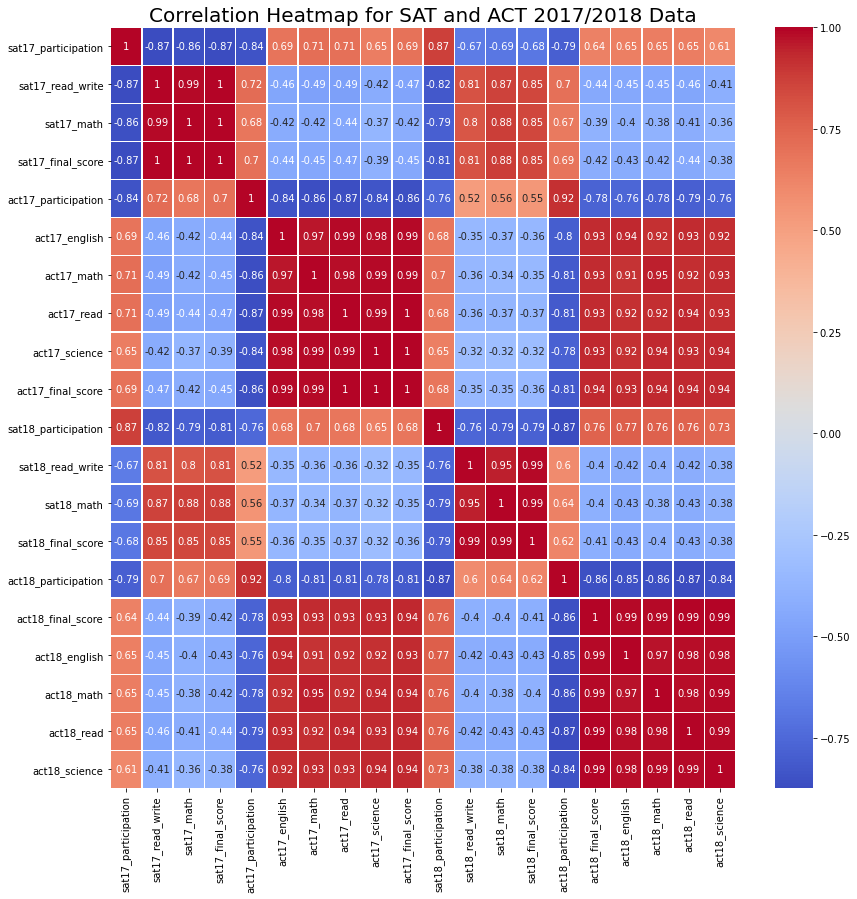

In [41]:
#set size of figure
plt.figure(figsize=(14,14))

#set title of figure
plt.title('Correlation Heatmap for SAT and ACT 2017/2018 Data',fontsize=20)

heatmap = sns.heatmap(final.corr(),annot=True,linewidths = 0.5 , linecolor = 'white', cmap = 'coolwarm')

For both 2017 and 2018, both tests show similar trends. 

SAT participation rates show a negative correlation with ACT participation.

SAT and ACT participation rates show negative correlation with their total or composite scores. 

For both tests, each individual component scores show positive correlation with one another and with the final score. 

Within the same type of component (e.g. SAT Math and ACT Math) between tests, there is a weak correlation. 

Between SAT total scores and ACT composite scores, there is a weak correlation.




#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [42]:
#function to subplot histograms
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = (12,nrows*6)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=10,ec='white')
        ax[i].set_title(list_of_titles[i], fontsize = 10)
        ax[i].set_xlabel(list_of_xlabels[i],fontsize = 8)
        
        # feel free to add more settings
        # Set titles, labels, etc here for each subplot


#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

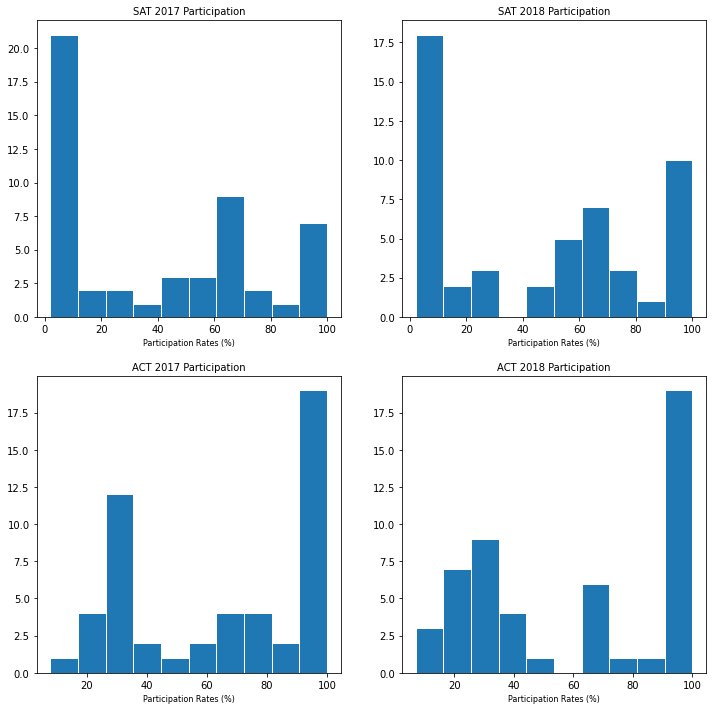

In [43]:
#Histogram: participation rates for SAT and ACT

# defining variables for participation histograms 
participation_columns = ['sat17_participation','sat18_participation','act17_participation','act18_participation']
participation_titles = ['SAT 2017 Participation','SAT 2018 Participation','ACT 2017 Participation','ACT 2018 Participation']
participation_xlabels = ['Participation Rates (%)','Participation Rates (%)','Participation Rates (%)','Participation Rates (%)']

#assigning variables to plot function
subplot_histograms(final,participation_columns,participation_titles,participation_xlabels)
plt.show()

In 2017 and 2018, ACT had 19 states with more than 90% participation, whereas SAT only had 6 states in 2017 but increased to 10 states in 2018.

In 2017, SAT had 21 states with participation rates of less than 10%, whereas ACT only had 1 state.
In 2018, the number of states with participation rates of less than 10% for SAT decreased to 18, whereas it incresed to 3 states for ACT. 

Overall, the histogram shows that SAT is less taken as compared to ACT. It may also suggest that many states prefer ACT or have ACT as a compulsory exam. 


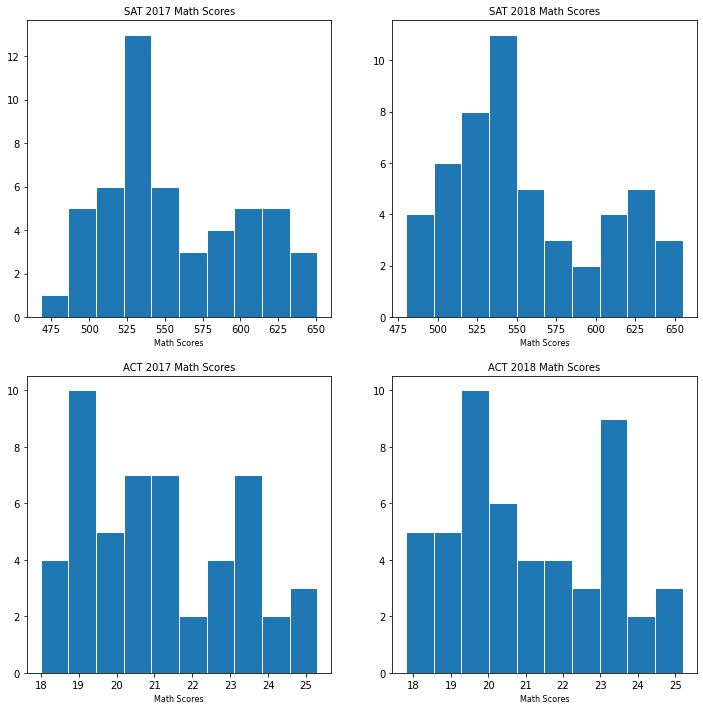

In [44]:
#Histogram: math scores for SAT & ACT

# defining variables for math score histograms 
math_columns = ['sat17_math','sat18_math','act17_math','act18_math']
math_titles = ['SAT 2017 Math Scores','SAT 2018 Math Scores','ACT 2017 Math Scores','ACT 2018 Math Scores']
math_xlabels = ['Math Scores','Math Scores','Math Scores','Math Scores']

#assigning variables to plot function
subplot_histograms(final,math_columns,math_titles,math_xlabels)
plt.show()

Distribution of math scores for SAT in 2017 and 2018 appear to be bimodal, with a higher peak at score 525-550.

Distribution of math scores for ACT in 2017 and 2018 appear to be bimodal as well.

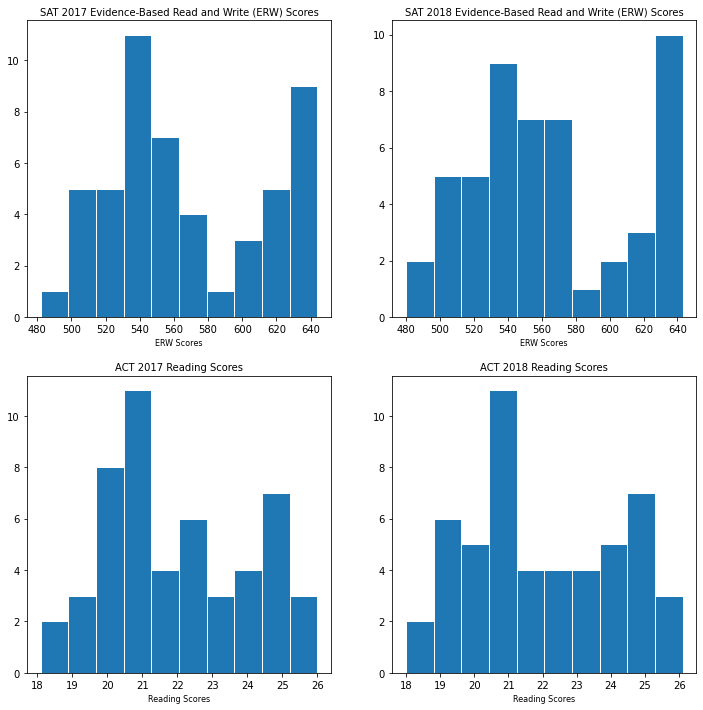

In [45]:
#Histogram of reading/verbal scores for SAT & ACT

# defining variables for read score histograms 
read_columns = ['sat17_read_write','sat18_read_write','act17_read','act18_read']
read_titles = ['SAT 2017 Evidence-Based Read and Write (ERW) Scores','SAT 2018 Evidence-Based Read and Write (ERW) Scores','ACT 2017 Reading Scores','ACT 2018 Reading Scores']
read_xlabels = ['ERW Scores','ERW Scores','Reading Scores','Reading Scores']

#assigning variables to plot function
subplot_histograms(final,read_columns,read_titles,read_xlabels)
plt.show()


Distribution of reading/verbal scores for SAT and ACT appear to be bimodal as well. However, there are 10 states in SAT scoring at the highest range of >620 as compared to only 3 states for ACT at its highest range in 2018. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


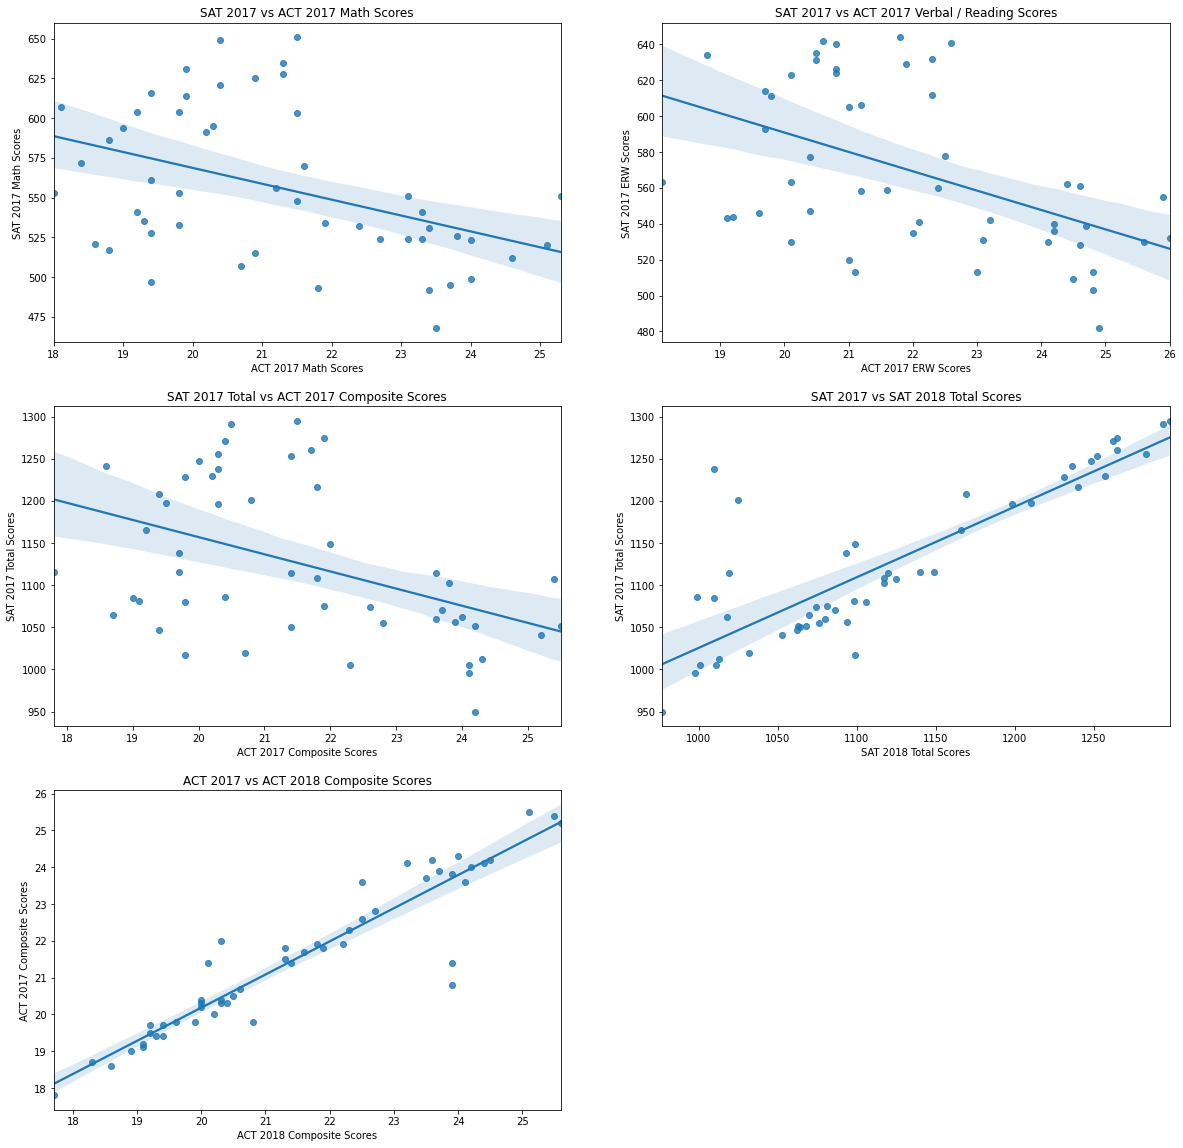

In [46]:
#function to plot scatter plot

def scatter_two_variables(dataframe, x_y_list, x_y_labels, title_list):
    # You'll want to specify your figsize
    nrows = int(np.ceil(len(x_y_list)/2))
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(20,20)) # You'll want to specify your figsize
    ax = ax.ravel()
    for i,x in enumerate(x_y_list):
        sns.regplot(x=dataframe[x[1]], y=dataframe[x[0]], ax = ax[i])
        ax[i].set_title(title_list[i])
        ax[i].set_xlabel(x_y_labels[i][1])
        ax[i].set_ylabel(x_y_labels[i][0])
        last_value = i
    #remove empty subplots    
    if last_value % 2 == 0:
        fig.delaxes(ax[last_value+1])

            

        
        
        
#assigning variables
x_y_list = [['sat17_math','act17_math'],['sat17_read_write','act17_read'],['sat17_final_score','act17_final_score'],['sat17_final_score','sat18_final_score'],['act17_final_score','act18_final_score']]
x_y_labels = [['SAT 2017 Math Scores','ACT 2017 Math Scores'],['SAT 2017 ERW Scores','ACT 2017 ERW Scores'],['SAT 2017 Total Scores','ACT 2017 Composite Scores'],['SAT 2017 Total Scores','SAT 2018 Total Scores'],['ACT 2017 Composite Scores','ACT 2018 Composite Scores']]
title_list = ['SAT 2017 vs ACT 2017 Math Scores', 'SAT 2017 vs ACT 2017 Verbal / Reading Scores','SAT 2017 Total vs ACT 2017 Composite Scores','SAT 2017 vs SAT 2018 Total Scores','ACT 2017 vs ACT 2018 Composite Scores']        
        
scatter_two_variables(final,x_y_list,x_y_labels,title_list)


There is a negative correlation between between SAT and ACT total scores. There is also a negative correlation between SAT and ACT subject scores. These relationships are however weak as the data points are far from the regression line.  

For both ACT and SAT, there is a linear relationship between each of their scores across 2017 and 2018.



#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

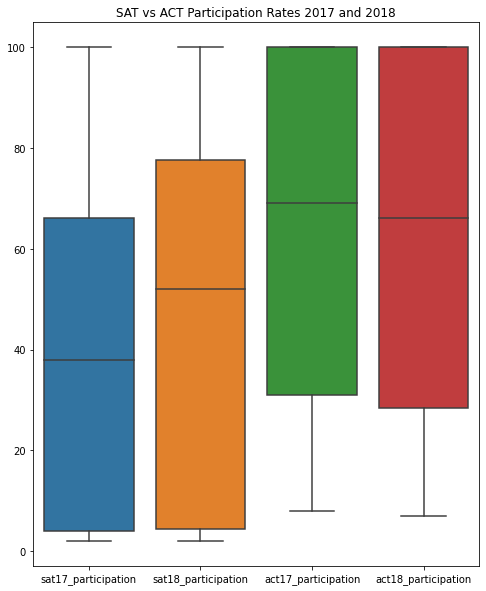

In [47]:
#sat vs act participation rates
plt.figure(figsize=(8,10))
participation_cols = ['sat17_participation','sat18_participation','act17_participation','act18_participation']
df_participation = final[participation_cols]

participation_box = sns.boxplot(data = df_participation).set_title('SAT vs ACT Participation Rates 2017 and 2018')



For both years in ACT, both the 3rd quartile and maximum is at 100% participation rates. However, there is a slight decrease in minimum and median for the ACT in 2018. 

For SAT, there is a significant increase of participation rates in 3rd quartile and median, although minimum stays the same.

Overall, there are more states with 100% participation rates for ACT than SAT in both years. Also, SAT has a lower median compared to ACT, with a lower 1st quartile. This indicates ACT has higher participation overall.



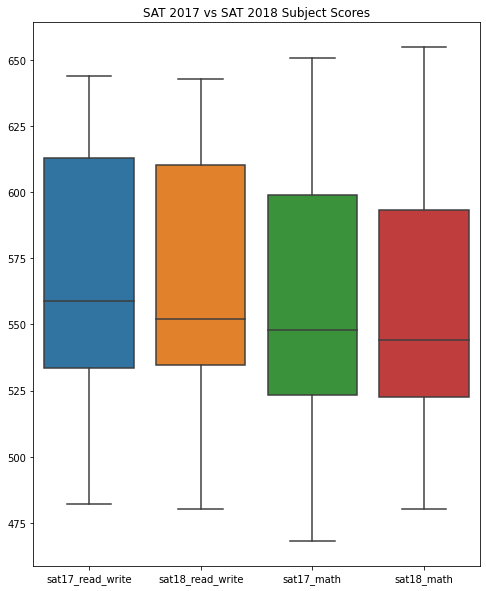

In [48]:
#sat 2017 vs sat 2018 scores
plt.figure(figsize=(8,10))
sat_sub_score_cols = ['sat17_read_write', 'sat18_read_write','sat17_math','sat18_math']
df_sat_sub_score = final[sat_sub_score_cols]

sat_score_box = sns.boxplot(data = df_sat_sub_score).set_title('SAT 2017 vs SAT 2018 Subject Scores')

For both years, the evidence-based read and write (ERW) component has a minimum, median and quartile that is slightly higher than the math component. Conversely, math component has a higher maximum compared to ERW. 

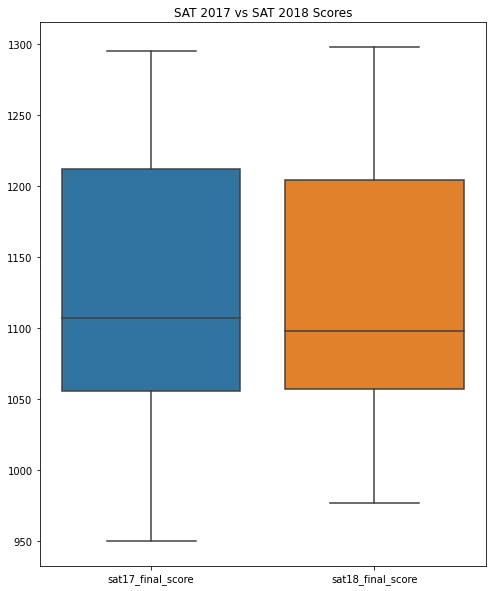

In [49]:
#sat 2017 vs sat 2018 total scores
plt.figure(figsize=(8,10))
sat_score_cols = ['sat17_final_score','sat18_final_score']
df_sat_score = final[sat_score_cols]

sat_sub_score_box = sns.boxplot(data = df_sat_score).set_title('SAT 2017 vs SAT 2018 Scores')

In SAT 2018, the median score decreased only slightly but the minimum is much higher than in SAT 2017.

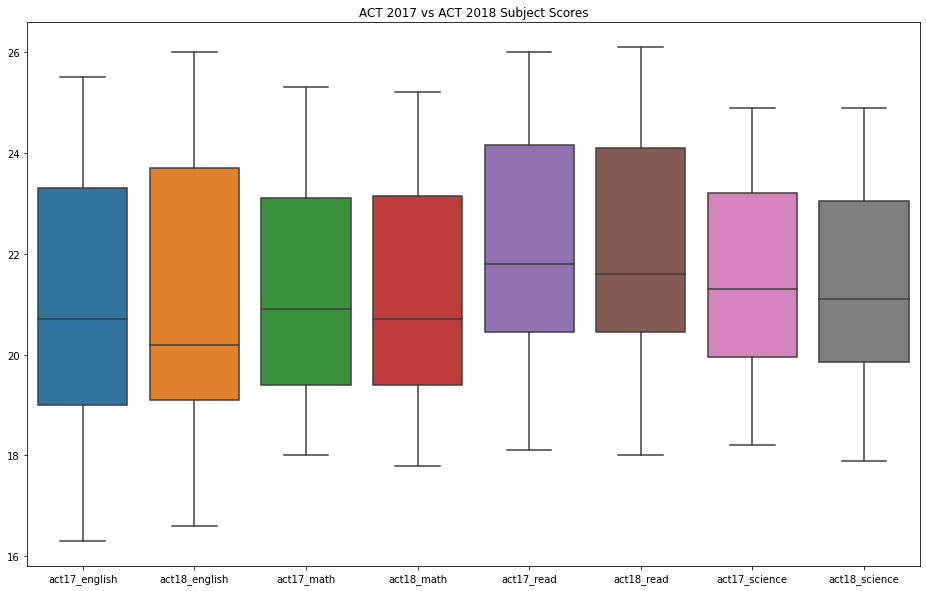

In [50]:
#act 2017 vs act 2018 indv scores
plt.figure(figsize=(16,10))
act_sub_score_cols = ['act17_english','act18_english', 'act17_math', 'act18_math', 'act17_read', 'act18_read','act17_science', 'act18_science']
df_act_sub_score = final[act_sub_score_cols]

act_sub_score_box = sns.boxplot(data = df_act_sub_score).set_title('ACT 2017 vs ACT 2018 Subject Scores')


Score distributions for each component between years generally do not show much difference.

The English component in ACT has the lowest median and minimum among all components. 
The Reading component in ACT has the highest median and maximum among all components.

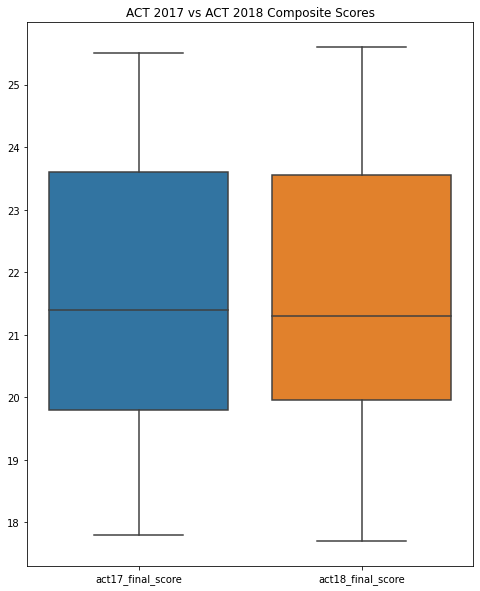

In [51]:
#act 2017 vs act 2018 composite scores
plt.figure(figsize=(8,10))
act_score_cols = ['act17_final_score','act18_final_score']
df_act_score = final[act_score_cols]

act_score_box = sns.boxplot(data = df_act_score).set_title('ACT 2017 vs ACT 2018 Composite Scores')



For ACT 2018, the median score also decreased only slightly. The distribution is almost similar in both years.


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [52]:
#function to plot distribution of each component

def subplot_distribution(dataframe):
    
    nrows = int(np.ceil(len(final.columns)/5)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=4, figsize = (20,nrows*6)) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(dataframe): # Gives us an index value to get into all our lists
        if 'act' in column:
            color = 'red'
        if 'sat' in column:
            color = 'green'
        sns.distplot(dataframe[column],ax = ax[i],color = color)
        ax[i].set_title(column, fontsize = 10)
        ax[i].set_xlabel(column,fontsize = 8)
        ax[i].axvline(dataframe[column].mean(), color = 'b') #mean line
        last_value = i
    #remove empty subplots    

        

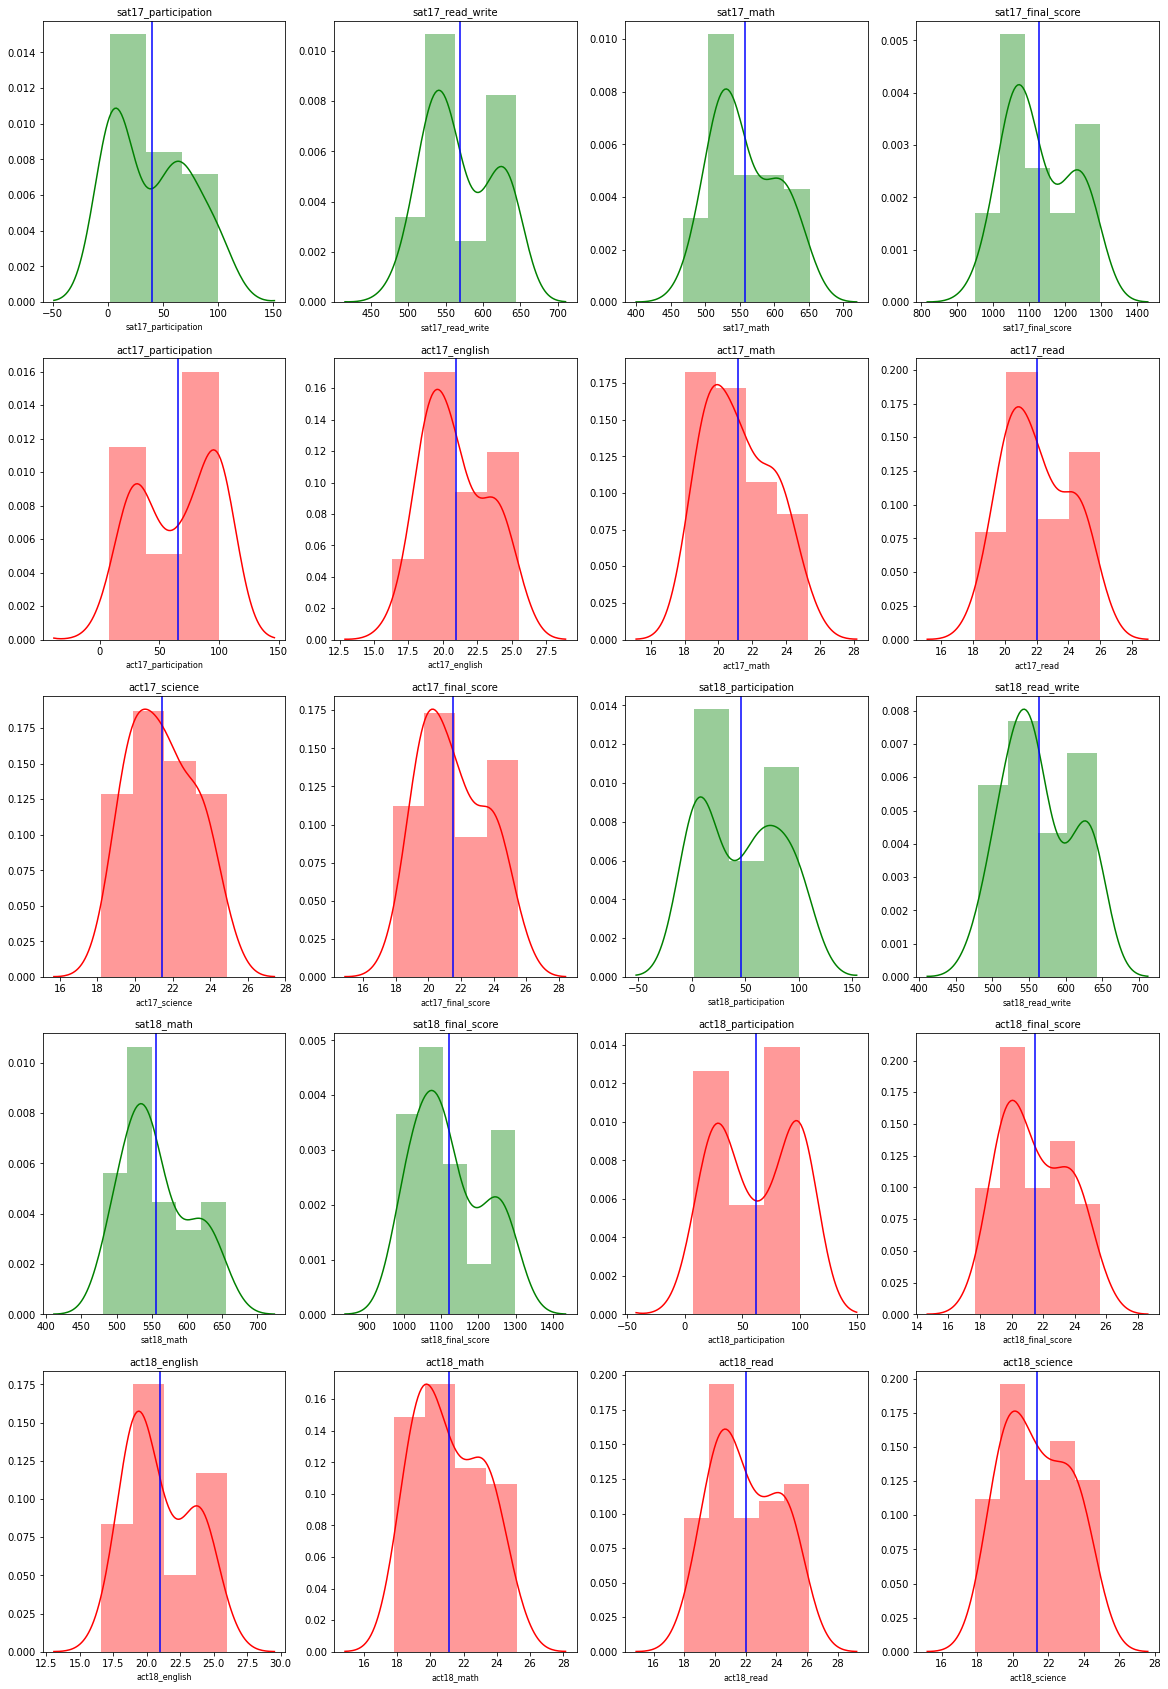

In [53]:
#drop state column and plot distributions
final_no_state = final.drop(['state'],axis=1)
subplot_distribution(final_no_state)

In [54]:
final.describe().T

,count,mean,std,min,25%,50%,75%,max
sat17_participation,51.0,39.803922,35.276632,2.0,4.00,38.0,66.00,100.0
sat17_read_write,51.0,569.117647,45.666901,482.0,533.50,559.0,613.00,644.0
sat17_math,51.0,556.882353,47.121395,468.0,523.50,548.0,599.00,651.0
sat17_final_score,51.0,1126.098039,92.494812,950.0,1055.50,1107.0,1212.00,1295.0
act17_participation,51.0,65.254902,32.140842,8.0,31.00,69.0,100.00,100.0
act17_english,51.0,20.931373,2.353677,16.3,19.00,20.7,23.30,25.5
act17_math,51.0,21.182353,1.981989,18.0,19.40,20.9,23.10,25.3
act17_read,51.0,22.013725,2.067271,18.1,20.45,21.8,24.15,26.0
act17_science,51.0,21.450980,1.739353,18.2,19.95,21.3,23.20,24.9
act17_final_score,51.0,21.519608,2.020695,17.8,19.80,21.4,23.60,25.5


Answers:


## SAT
### 2017
#### Participation Rates
The distribution is skewed right and bimodal. In 2017, SAT had 21 states with participation rates of less than 10% and 6 states with participation rates of more than 90%. There is a peak at ~60-70%. The mean 39.8% is higher than the median at 38%. Overall, SAT was less taken among the states.

#### Evidence-based Reading and Writing (ERW)
The distribution is bimodal. The highest peak is around score of 540 and a lower peak is observed at 625.  The mean is at 569 and median at 559.

#### Math
The distribution is skewed right. The highest peak is around score 530. The mean is at 556, and median at 548.

#### Total Score
The distribution is skewed right and bimodal. The highest spike is in the score of 1050 - 1100, well below the mean. There is a lower spike around 1250. 


### 2018

#### Participation Rates
The distribution is skewed right and bimodal. Although similar to the distribution in 2017, there is now higher density at higher participation rates. In 2018, SAT had a decrease to 17 states with participation rates of less than 10% and an increase to 10 states with participation rates of more than 90%. There is a peak at ~70-80%, indicating an increase in taking SAT compared to 2017.

#### Evidence-based Reading and Writing (ERW)
The distribution is bimodal. The highest peak is around score of 545 and a lower peak is observed at 625.  The mean is at 569 and median at 559.

#### Math
The distribution is skewed right. The highest peak is around score 540. The mean is at 556, and median at 522.5.

#### Total Score
The distribution is skewed right and bimodal. The highest spike is in the score of 1050 - 1100,  below the mean. There is a lower spike around 1250. The mean is at 1120. The median is at 1098. 



## ACT
### 2017

#### Participation Rates
The distribution is bimodal and skewed left. In 2017, ACT had only 1 state with less than 10% participation and 19 states with more than 90% participation. The peak in the higher range of participation rates is higher than the peak in the lower range of participation rates.

#### English
The distribution is skewed right. The peak is around 19.0, below the median 20.7, and mean 20.9.

#### Reading
The distribution is skewed right. The peak is around 20.5, below the median 21.8, and mean 22.0.

#### Math
The distribution is skewed right. The peak is around 20.0, below the median 20.9 and mean 21.2. 

#### Science
The distribution is skewed right. The peak is around 20.0, below the median 21.3, and mean 21.45. 

#### Composite Score
The distribution is skewed right. The peak is around 20.0, below the median 21.4, mean 21.5.


### 2018

#### Participation Rates
The distribution is bimodal and skewed left. In 2018, ACT had an increase to 3 states with less than 10% participation and maintained 19 states with more than 90% participation. The peak in the higher range of participation rates decreased and is now at the same level as the peak in the lower range of participation rates which increased. 

#### English
The distribution is bimodal and skewed right. 

#### Reading
The distribution is skewed right.

#### Math
The distribution is skewed right.

#### Science
The distribution is skewed right.

#### Composite Score
The distribution is skewed right.




#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

Answer: 

No, we do not see the trend in most distributions. 

This could be because the tests could be made mandatory in certain states, and if optional depends on student's choice / confidence in which test to take. 




Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
Math and reading results are not normal and show a right skew. The centre is densely concentrated on the left. Estimates made from these data may not be accurate as there is no clear center (mean, median, mode different) on a right-skewed graph. There will be large errors.

Participate rates are not normal and are bimodal. States may make the tests optional or a certain test mandatory. Estimates made from this data will not be accurate as many observations are observed closed to the limits.


#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer: 
No. Although the sample size is big enough, there may be overlaps where some students take both exams, and we do not have this data to compare. We also do not know the actual size of participation, when given only the participation rates. For states with low participation rates, the aggregation of data may be biased as these students may have only taken the test due to high confidence in scoring.


##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

Answer: No, it is not appropriate to compare the math scores of SAT and ACT. The exams are different in their methodologies, for example:

- SAT has a no-calculator-allowed section, whereas ACT does not. 
- SAT is 80 minutes, ACT is 60 minutes.
- Types and weightage of math concepts tested are different. 

If we have sufficient data of those taking both ACT and SAT in the same year, we may be able to normalize the results for comparison. 

Source: https://blog.collegevine.com/difference-sat-act-math/, https://blog.prepscholar.com/act-vs-sat

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [55]:
# States with more than 30% increase in SAT scores
final['sat_difference'] = final['sat18_participation'] - final['sat17_participation']
sat_difference = final[final['sat_difference'] > 30]
sat_difference

,state,sat17_participation,sat17_read_write,sat17_math,sat17_final_score,act17_participation,act17_english,act17_math,act17_read,act17_science,...,sat18_read_write,sat18_math,sat18_final_score,act18_participation,act18_final_score,act18_english,act18_math,act18_read,act18_science,sat_difference
5,Colorado,11.0,606,595,1201,100.0,20.1,20.3,21.2,20.9,...,519,506,1025,30,23.9,23.9,23.2,24.4,23.5,89.0
13,Illinois,9.0,559,556,1115,93.0,21.0,21.2,21.6,21.3,...,513,506,1019,43,23.9,24.1,23.4,24.2,23.4,90.0


Based on the observations, three states that demonstrate interesting trends are Colorado, Illinois, and Florida.

### Colorado

In [56]:
colorado = final[final['state'] == 'Colorado']
colorado.loc[:,('sat17_participation','sat18_participation','act17_participation','act18_participation','sat17_final_score','sat18_final_score','act17_final_score','act18_final_score')]

,sat17_participation,sat18_participation,act17_participation,act18_participation,sat17_final_score,sat18_final_score,act17_final_score,act18_final_score
5,11.0,100.0,100.0,30,1201,1025,20.8,23.9


In Colorado, SAT participation rates increased from 11% (2017) to 100% (2018) and coincided with a decrease in ACT participation rates from 100% (2017) to 30% (2018).

This can be explained by the fact that Colorado changed its mandatory test to SAT from April 2017 <cite>[1]</cite> . There is also no cost for students who take SAT starting then <cite>[2]</cite>. Not only that, free and personalized SAT study courses are provided for Colorado students <cite>[1]</cite>.

SAT average scores decreased from 1201 in 2017 to 1025 in 2018 as there is now a broader range of students taking the test since it is mandatory.

ACT average scores increased from 20.8 in 2017 to 23.9 in 2018 due to self-selection of high scoring students. 

1 [Colorado juniors face new, revamped college exam in SAT](https://www.denverpost.com/2017/03/06/colorado-juniors-sat-college-exam/)

2 [Colorado Changed to the SAT in 2017: What You Need to Know
](https://www.testive.com/colorado-sat-change-2017/)

### Illinois

In [57]:
#florida participation and scores
illinois = final[final['state'] == 'Illinois']
illinois.loc[:,('sat17_participation','sat18_participation','act17_participation','act18_participation','sat17_final_score','sat18_final_score','act17_final_score','act18_final_score')]

,sat17_participation,sat18_participation,act17_participation,act18_participation,sat17_final_score,sat18_final_score,act17_final_score,act18_final_score
13,9.0,99.0,93.0,43,1115,1019,21.4,23.9


In Illinois, SAT participation rates increased from 9% (2017) to 99% (2018) and coincided with a decrease in ACT participation rates from 93% (2017) to 43% (2018).

This can be explained by the fact that Illinois switched its state administered test to SAT in 2016. Due to state budget standoff and other issues, it was not provided free by the state in the year (although some districts paid for it), hence that may explain the initial low participation in 2017 <cite>[1]</cite>. The dramatic increase in 2018 could also be due to free online SAT preparatory materials <cite>[2]</cite>. In addition, SAT traditionally never had dominance in the Midwest indicating a lack of confidence in test takers and why act participation did not decrease to a much lower ground <cite>[3]</cite>.

Similar to Colorado, SAT average scores decreased from 1115 in 2017 to 1019 in 2018 as there is now a broader range of students taking the test since it is mandatory. 

ACT average scores increased from 21.4 in 2017 to 23.9 in 2018. Students may have not been more prepared with the format of ACT considering they have been practicing the ACT in the last 15 years before the switch <cite>[1]</cite>.

1 [Illinois moves ahead with new testing plan, replacing ACT with SAT](https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html)

2 [Free Khan Academy SAT tutorials boost scores, study finds](https://edsource.org/2017/free-khan-academy-sat-tutorials-boost-scores-study-finds/581450)

3 [Illinois has embraced the SAT, and the ACT is mad about it
](https://chalkbeat.org/posts/chicago/2018/07/27/act-protests-state-boards-embrace-of-rival-test-provider/)

### Florida

In [58]:
florida = final[final['state'] == 'Florida']
florida.loc[:,('sat17_participation','sat18_participation','act17_participation','act18_participation','sat17_final_score','sat18_final_score','act17_final_score','act18_final_score')]

,sat17_participation,sat18_participation,act17_participation,act18_participation,sat17_final_score,sat18_final_score,act17_final_score,act18_final_score
9,83.0,56.0,73.0,66,1017,1099,19.8,19.9


Florida had high participation rates of more than 50% in both SAT and ACT. Students in Florida are not required to take any mandatory test and college-bound students can choose between SAT or ACT <cite>[1]</cite>

In 2017, the participation rate of SAT was higher than in ACT. This could be because many Florida school districts participated in "SAT School Day" events where students take the exam during a school day, with the cost covered by their schools <cite>[1]</cite>. 

In 2018, the participation rate of SAT dropped to 56%, well below ACT at 66%. According to Orlando Sentinel and Florida Pheonix, there should be ~97% participation rate or an increase in 2018, which were pushed by free test sessions at schools and free online preparatory materials. Hence, there could have been an error in the data. <cite>[2] [3]</cite>


1 [ACT, SAT scores for Florida's class of 2017 ](https://www.orlandosentinel.com/news/education/os-act-sat-florida-scores-20170928-story.html)

2 [SAT, ACT: Florida students lag behind national averages
](https://www.orlandosentinel.com/news/education/os-ne-act-sat-florida-scores-20181024-story.html)

3 [Florida scores drop on the SAT; Most teens tested not ready for college classes](https://www.floridaphoenix.com/blog/florida-scores-drop-on-the-sat-most-teens-tested-not-ready-for-college-classes/)

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

#### Key Takeaways
- Participation rates in SAT or ACT is heavily dependent on the state's policy (mandatory or optional). 
- Participation rates are negatively correlated with test scores. 
- Year-to-year average test scores does not show huge differences.
- ACT has a larger proportion of states with mandatory testing, resulting in more states with higher participation rates. 
- SAT has a larger proportion of states with lower participation rates, mostly due to self-selection. It has gained more traction on its participation rates with working with policy stakeholders to make the test state-administered.

#### Overall Recommendations
- Focus on states with no mandatory testing to increase participation rates such as providing free prep classes and working with schools on more engagement activities.
- Remarketing to states that have already made SAT mandatory or have high participation rates.
- Identify states with expiring ACT contracts and work with Education Board or stakeholders. 

#### Suggested State to Focus On
It is suggested that the College Board focuses on West Virginia to increase participation rates. West Virginia has no mandatory tests and students are not restricted to taking any particular test. The SAT participation rates for West Virginia has doubled from 14% to 28%, coinciding with a slight decrease in participation rates for ACT from 69% to 65%. There is huge growth potential. Geographically, it is located next to Pennsylvania and Virginia which has increasing SAT participation rates of more than 60%, and low ACT participation rates of less than 30%. Suggestions on how to increase participation rates are:  

- Partnership with schools by having more engagement activities such as making preparatory materials more accessible in schools, providing talks on scoring techniques and strategies, customized scoring advices, offering scholarships. 

- Increasing popularity with students online: providing preparatory materials online, webinars, working with online tutoring sites / channels.

- Engaging and establishing a good relationship with stakeholders: If SAT becomes administered at state or district level, students would be able to take them for free or at a lower price. This makes it enticing for students. 


#### Additional Data needed
- SAT and ACT test data for a wider range of years
- Participation rates and scores breakdown by district. 